In [1]:
## IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

## SETTINGS
plt.style.use('dark_background')
#cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
#cmap_bold = ['darkorange', 'c', 'darkblue']
pd.set_option('display.max_rows', 250)

def pow(n,m): return np.float_power(n,m)

In [2]:
## ADULT DATA
adult_names = ['age', 'workclass', 'fnlwgt', 'education', 
               'education-num', 'marital-status', 'occupation', 
               'relationship', 'race', 'sex', 'capital-gain', 
               'capital-loss', 'hours-per-week', 'native-country', 'Y']
# Original sets
adult = pd.read_csv('Adult/adult.data', names=adult_names, sep=',')


# Setup for One Hot Enconding
ct = ColumnTransformer(
    [('one_hot_encoder', 
      OneHotEncoder(categories='auto', 
                    sparse=False, handle_unknown='ignore'), 
      [1,3,5,6,7,8,9,13])],
    remainder='passthrough'
)

ct2 = ColumnTransformer(
  [('one_hot_encoder',
    OneHotEncoder(categories='auto',
                  sparse=False, handle_unknown='ignore'),
    [0])],
  remainder='passthrough'
)


In [3]:
def cross_validate(df, model=KNeighborsClassifier, model_params={"n_neighbors": 5}):
    folds = split(df)
    val_results = []
    trn_results = []
    for train, validate in folds:
        training, training_labels = train
        validation, validation_labels = validate
        mdl = model(**model_params)
        mdl = mdl.fit(training, training_labels)
        trn_results.append(mdl.score(training, training_labels))
        val_results.append(mdl.score(validation, validation_labels))
    return val_results, trn_results


def split(df):
    y = df[df.shape[1]-1]
    X = df.drop(df.shape[1]-1, axis=1)
    folds = []
    rows = X.shape[0]
    for fold in np.array_split(range(rows), 5):
        validate_data = X.loc[fold[0]: fold[-1]]
        validate_labels = y.loc[fold[0]: fold[-1]]
        train_data = X.drop(X.index[fold[0]: fold[-1]])
        train_labels = y.drop(y.index[fold[0]: fold[-1]])
        folds.append(((train_data, train_labels),
                      (validate_data, validate_labels)))
    return folds

def split(df):
    folds = []
    rows = df.shape[0]
    cols = df.shape[1]-1
    y = df.iloc[:,cols]
    X = df.iloc[:, 0:cols]
    for fold in np.array_split(range(rows), 5):
        validate_data = X.loc[fold[0]: fold[-1]]
        validate_labels = y.loc[fold[0]: fold[-1]]
        train_data = X.drop(X.index[fold[0]: fold[-1]])
        train_labels = y.drop(y.index[fold[0]: fold[-1]])
        folds.append(((train_data, train_labels),
                      (validate_data, validate_labels)))
    return folds

In [4]:
def split2(df):
    folds = []
    rows = df.shape[0]
    cols = df.shape[1]
    y = df.iloc[:,0]
    X = df.iloc[:, 1:cols]
    for fold in np.array_split(range(rows), 5):
        validate_data = X.loc[fold[0]: fold[-1]]
        validate_labels = y.loc[fold[0]: fold[-1]]
        train_data = X.drop(X.index[fold[0]: fold[-1]])
        train_labels = y.drop(y.index[fold[0]: fold[-1]])
        folds.append(((train_data, train_labels),
                      (validate_data, validate_labels)))
    return folds

def cross_validate(df, model=KNeighborsClassifier, model_params=[5]):
    folds = split(df)
    results = []
    for train, validate in folds:
        training, training_labels = train
        validation, validation_labels = validate
        mdl = model(*model_params)
        mdl = mdl.fit(training, training_labels.values.ravel())
        results.append(mdl.score(validation, validation_labels))
    return results

In [5]:
def cross_validate2(df, model=KNeighborsClassifier, model_params=[5]):
    folds = split2(df)
    results = []
    for train, validate in folds:
        training, training_labels = train
        validation, validation_labels = validate
        mdl = model(*model_params)
        mdl = mdl.fit(training, training_labels.values.ravel())
        results.append(mdl.score(validation, validation_labels))
    return results

In [6]:
def cross_validate_sample(df, samples):
    df = df[~(df.values == ' ?').any(1)]
    df = df.sample(n=samples)
    cols = df.shape[1]-1
    df_X = df.iloc[:, 0:cols]
    df_Y = df.iloc[:, cols]
    enc_df = pd.DataFrame(ct.fit_transform(df_X, df_Y))
    return np.mean(cross_validate(enc_df))

In [7]:
def cross_validate_letters(df, samples):
    df = df.sample(n=samples)
    enc_df = pd.DataFrame(ct2.fit_transform(df))
    return np.mean(cross_validate2(enc_df))

In [30]:

samples = np.linspace(10, 14000, 50)
samples = [int(n) for n in samples.tolist()]

print(samples)

[10, 295, 581, 866, 1152, 1437, 1723, 2008, 2294, 2579, 2865, 3150, 3436, 3721, 4007, 4292, 4578, 4863, 5149, 5434, 5720, 6005, 6291, 6576, 6862, 7147, 7433, 7718, 8004, 8289, 8575, 8860, 9146, 9431, 9717, 10002, 10288, 10573, 10859, 11144, 11430, 11715, 12001, 12286, 12572, 12857, 13143, 13428, 13714, 14000]


In [31]:
adult_results = []
for n in samples:
    adult_results.append(cross_validate_sample(adult, n))
    
adult_results

[0.49444444444444446,
 0.451884431094901,
 0.48933034634629635,
 0.4498109326767394,
 0.4326715800601214,
 0.4136661845356898,
 0.4553934089585391,
 0.44101319351362933,
 0.43284151779366586,
 0.45479534921989506,
 0.4273348814093123,
 0.425377306813245,
 0.43020888304844335,
 0.43104918361276373,
 0.43902938139955383,
 0.4296800214760278,
 0.43470211962364225,
 0.44467051643734357,
 0.44405310629876366,
 0.4469888070736724,
 0.4348227531699238,
 0.4400390413469178,
 0.4352930224064687,
 0.44130963599424583,
 0.4451792368654287,
 0.43321533506632115,
 0.4318835881561795,
 0.44434163077321137,
 0.43836662271604254,
 0.4447231477150287,
 0.42455562623575255,
 0.43997577399506504,
 0.44282234800507914,
 0.4374599373253578,
 0.4337309062293809,
 0.43208264540961216,
 0.43443174572321,
 0.4356209608260329,
 0.44090758599333235,
 0.437236361593999,
 0.43746160215484264,
 0.4349711412613095,
 0.4374165174311657,
 0.436670862354618,
 0.4362223471616461,
 0.44787318375328233,
 0.440524357426884

In [32]:
adult_test = pd.read_csv('Adult/adult.test', names=adult_names, sep=',', header=1)

adult_test_results = []
for n in samples:
    adult_test_results.append(cross_validate_sample(adult_test, n))
adult_test_results

[0.4333333333333333,
 0.40828863620110134,
 0.3685572932994484,
 0.41808304741576574,
 0.42931166507151514,
 0.422197233007212,
 0.43988121939839564,
 0.4300593183140716,
 0.43170203519252404,
 0.45508957443702824,
 0.43274424247405985,
 0.42470353790068194,
 0.4321295186502411,
 0.431518394742875,
 0.4323211799307628,
 0.4310535048109432,
 0.4399712571401668,
 0.4396062084217497,
 0.44434597840925527,
 0.4379697315601967,
 0.4430827938720664,
 0.4402472445352078,
 0.4383141279040797,
 0.4421660811362452,
 0.429967623596342,
 0.4294188243589259,
 0.43721191124595354,
 0.4404219174837964,
 0.4385538396974276,
 0.4352668635492156,
 0.4424557359954413,
 0.4357434594085453,
 0.43746529516857613,
 0.43637288060211743,
 0.4389668923309877,
 0.44260450619450975,
 0.4411263670752824,
 0.4378556184350534,
 0.44450978321346046,
 0.43416325849553994,
 0.4390472876237655,
 0.4414049736215742,
 0.43946876569210536,
 0.4425914162699314,
 0.44295291340592396,
 0.43800531986907665,
 0.4410857446512666

In [33]:
letters_names = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 
                 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr',
                 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
letters = pd.read_csv('Letter/letter-recognition.data', names=letters_names, sep=',')

letters_results = []
for n in samples:
    letters_results.append(cross_validate_letters(letters, n))
    
letters_results

[0.9,
 0.9898305084745763,
 0.9896699086354259,
 0.9884393063583815,
 0.988710709580275,
 0.9916545683313975,
 0.9901280754971353,
 0.9925323507152516,
 0.9947683877044268,
 0.9941845412809514,
 0.994066317626527,
 0.993968253968254,
 0.9947615178903895,
 0.995699285559645,
 0.9955071746351972,
 0.9953404375988777,
 0.994758154962178,
 0.9960930726318417,
 0.9943679885268948,
 0.996503292722803,
 0.9963286713286713,
 0.9961698584512906,
 0.9965032686753942,
 0.9966544546788864,
 0.9970851851301337,
 0.9967819444376478,
 0.9974438855907775,
 0.9968903522174353,
 0.997750858838226,
 0.9978283452953548,
 0.998600583090379,
 0.9976297968397292,
 0.9975946126014694,
 0.9984094443142538,
 0.9975301758555032,
 0.9978005497251374,
 0.9981531691779427,
 0.9982028623764568,
 0.99825024833461,
 0.9982053927621294,
 0.9982502187226597,
 0.9989756722151089,
 0.9980001735388033,
 0.9982907307561499,
 0.9976932676020251,
 0.9985999783444122,
 0.9981738923018227,
 0.9988085819151931,
 0.99846880315732

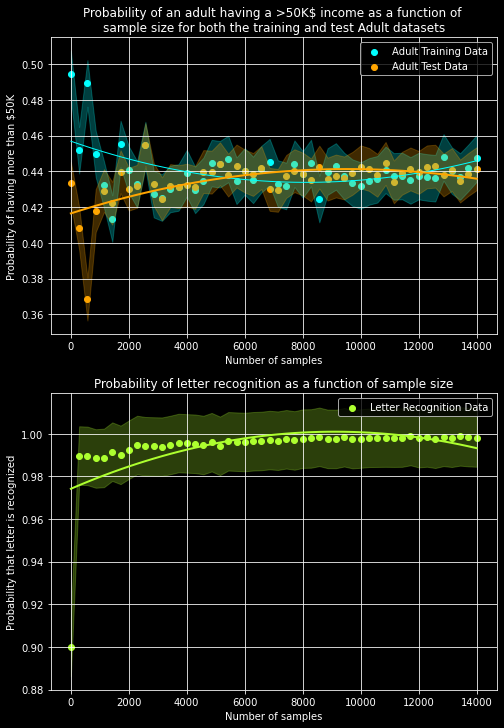

In [36]:
t = samples

tr_std = np.std(adult_results)
ts_std = np.std(adult_test_results)
lt_std = np.std(letters_results)

p0,p1,p2 = np.polyfit(t, adult_results, deg=2)
q0,q1,q2 = np.polyfit(t, adult_test_results, deg=2)
s0,s1,s2 = np.polyfit(t, letters_results, deg=2)

f1 = p0*np.power(t,2) + p1*np.power(t,1) + p2*np.power(t,0)
f2 = q0*np.power(t,2) + q1*np.power(t,1) + q2*np.power(t,0)
f3 = s0*np.power(t,2) + s1*np.power(t,1) + s2*np.power(t,0)

fig = plt.figure(figsize=(8,12))
fig.tight_layout(pad=5.0)
ax, ax1 = fig.subplots(2)
ax.set_title("Probability of an adult having a >50K$ income as a function of \nsample size for both the training and test Adult datasets")
ax.scatter(samples, adult_results, c='cyan', 
           label='Adult Training Data' )
ax.scatter(samples, adult_test_results, c='orange',
           label='Adult Test Data')

ax.grid()
ax.legend(borderpad=0.4)
ax.set_xlabel('Number of samples')
ax.xaxis.label.set_color('white')
ax.set_ylabel('Probability of having more than $50K')
ax.tick_params()
ax.plot(t,f1, linewidth=1, color='cyan')
ax.plot(t,f2, linewidth=2, color='orange')
ax.fill_between(samples, adult_results-tr_std, adult_results+tr_std, alpha=0.25, color='cyan')
ax.fill_between(samples, adult_test_results-ts_std, adult_test_results+ts_std, alpha=0.25, color='orange')


ax1.set_title("Probability of letter recognition as a function of sample size")
ax1.grid()
ax1.scatter(samples, letters_results, c='greenyellow',
           label='Letter Recognition Data')
ax1.legend()
ax1.set_xlabel('Number of samples')
ax1.set_ylabel('Probability that letter is recognized')

ax1.plot(t,f3, linewidth=2, color='greenyellow')
ax1.fill_between(samples, letters_results-lt_std, letters_results+lt_std, alpha=0.25, color='greenyellow')